In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [16]:
def take_input():
    n = 0
    while True:
        try:
            n = int(input('Enter the number of qubits: '))
        except:
            print('Enter valid natural number as number of gates!!')
            continue
        else:
            break

    return n

In [3]:
def ranged_input(n, input_string='', lower_limit=0):
    while True:
        inp = int(input(input_string))
        if inp < lower_limit or inp >= n:
            print(f'Please enter a whole number less than {n}')
            continue
    
        return inp

In [4]:
def create_circuit():
    n = take_input()
    
    qc = QuantumCircuit(n)
    gates = ['X', 'H', 'CX', 'CY', 'I']
    
    while True:
        gate = input('Enter the type of gate (Enter "done" when finished giving inputs): ').upper()
        if gate == 'DONE':
            break
        
        if gate not in gates:
            print(f'Please enter a valid gate (Possible values: {gates}): ')
            continue
        
        if gate == 'X' or gate == 'I' or gate == 'H':
            input_string = f'Enter qubit to apply {gate}-gate: '
            qubit = ranged_input(n, input_string=input_string)
            if gate == 'X':
                qc.x(qubit)
            elif gate == 'I':
                qc.id(qubit)
            else:
                qc.h(qubit)
               
        elif gate == 'CX' or gate == 'CY':
            control = int(input('Enter control qubit: '))
            target = int(input('Enter target qubit: '))
            
            if gate == 'CX':
                qc.cx(control, target)
            else:
                qc.cy(control, target)
    
    return qc, n

In [5]:
qc, n = create_circuit()

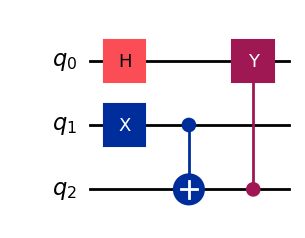

In [6]:
qc.draw('mpl')

In [7]:
def composite_gate(n):
    aux = QuantumCircuit(n, name='AUX')
    gates = ['CX', 'H', 'I', 'X', 'CY']
    gates_order = []
    
    while True:
        gate = input('Enter the type of gate (Enter "done" when finished giving inputs): ').upper()
        if gate == 'DONE':
            break
        
        if gate not in gates:
            print(f'Please enter a valid gate (Possible values: {gates}): ')
            continue
                
        if gate == 'X' or gate == 'I' or gate == 'H':
            input_string = f'Enter qubit to apply {gate}-gate: '
            qubit = ranged_input(n, input_string=input_string)
            if gate == 'X':
                gates_order.append(['X', qubit])
                aux.x(qubit)
            elif gate == 'I':
                gates_order.append(['I', qubit])
                aux.id(qubit)
            else:
                gates_order.append(['H', qubit])
                aux.h(qubit)
               
        elif gate == 'CX' or gate == 'CY':
            control = int(input('Enter control qubit: '))
            target = int(input('Enter target qubit: '))
            
            if gate == 'CX':
                gates_order.append(['CX', control, target])
                aux.cx(control, target)
            else:
                gates_order.append(['CY', control, target])
                aux.cy(control, target)
    
    res = QuantumCircuit(n, name='RES')
    
    for item in gates_order[::-1]:
        gate = item[0]
        
        if gate == 'X':
            qubit = item[1]
            res.x(qubit)
        
        elif gate == 'H':
            qubit = item[1]
            res.h(qubit)
        
        elif gate == 'I':
            qubit = item[1]
            res.id(qubit)
        
        elif gate == 'CX':
            control = item[1]
            target = item[2]
            res.cx(control, target)
        
        elif gate == 'CY':
            control = item[1]
            target = item[2]
            res.cy(control, target)
    
    print('Aux circuit: ')
    display(aux.draw('mpl'))
    print('Res circuit: ')
    display(res.draw('mpl'))
    
    return aux.to_gate(), res.to_gate()

Aux circuit: 


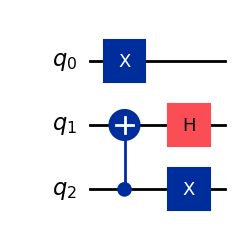

Res circuit: 


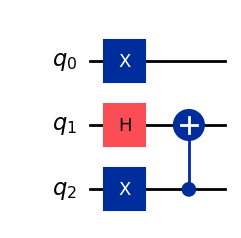

In [12]:
aux, res = composite_gate(n)

Original circuit output:
{'111': 4995, '110': 5005}

Obfuscated circuit output:
{'111': 4916, '110': 5084}


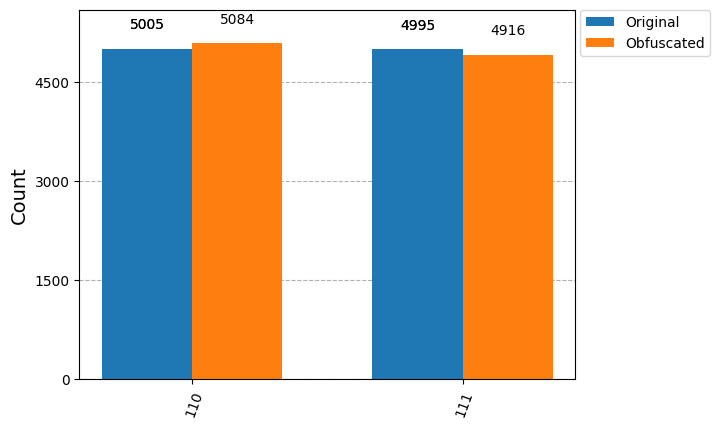

In [13]:
def measure_and_simulate(circuit, n):
    simulator = AerSimulator()
    
    # Add measurement to all qubits
    circuit.measure_all()
    
    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(circuit, simulator)
    
    # Run the simulation
    result = simulator.run(transpiled_circuit, shots=10000).result()
    
    # Get counts (i.e., measurement results)
    counts = result.get_counts(transpiled_circuit)
    
    return counts

# Original circuit before obfuscation
qc_original = qc.copy()
qc_obfuscated = qc.copy()

# Add measurement to original circuit and simulate
original_counts = measure_and_simulate(qc_original, n)

# Add obfuscation gates to qc (already done in your code)
qc_obfuscated.append(aux, range(n))
qc_obfuscated.append(res, range(n))

# Simulate obfuscated circuit
obfuscated_counts = measure_and_simulate(qc_obfuscated, n)

# Compare the results
print("Original circuit output:")
print(original_counts)
print("\nObfuscated circuit output:")
print(obfuscated_counts)

# Visualize results
plot_histogram([original_counts, obfuscated_counts], legend=['Original', 'Obfuscated'])

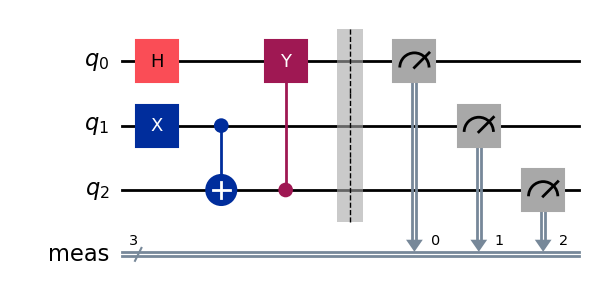

In [14]:
qc_original.draw('mpl')

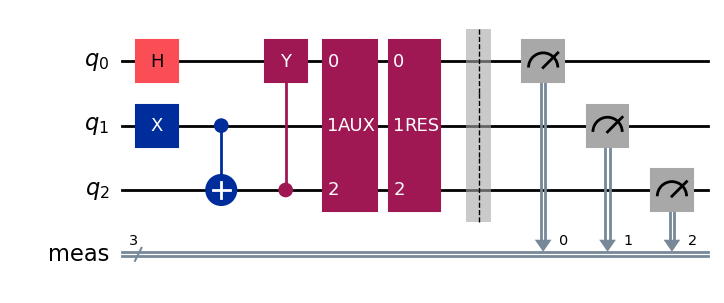

In [15]:
qc_obfuscated.draw('mpl')